#  Reading Excel Data Via the Knowledge Network

Python provides plenty of tools for reading and visualising different kinds of tabular data. Here we demonstrate using pandas and xlrd to load and manipulate excel data and the display this data in a matplotlib graph. Using a simple custom widget defined in the 'Filtering Widget.ipynb'

In [173]:
import pandas, xlrd, requests 
from pandas import np
import matplotlib.pyplot as plt
pandas.set_option('display.max_columns', 500)
%matplotlib inline

In [174]:
response = requests.get("http://kn.csiro.au/api/dataset?id=http%3A%2F%2Foznome.csiro.au%2Fid%2Fdata%2Fdata-gov-au%2Fsaimos-biological-and-flow-cytometry-data-collected-from-ctd-stations-in-south-australia-i-20142")
json_data = response.json()
url = [resource for resource in json_data["resources"] if "Picophytoplankton" in resource["name"]][0]["url"]
url

'http://data.aodn.org.au/IMOS/SAIMOS/Flow_Cytometry/2014/07/2014_07_SAIMOS_ANMN_Picophyto_FV02.xls'

In [175]:
r = requests.get(url)
book = xlrd.open_workbook(file_contents=r.content)
book.sheet_names()

['RAW',
 'Values for Conversions',
 'Converted_Normalised_QAQC',
 'Converted_CLEAN',
 'emII format']

In [176]:
dataframe = pandas.read_excel(url,sheetname='Converted_CLEAN')
dataframe.columns

Index(['Flag', 'Flag comments', 'Station', 'Rep', 'Depth (category)',
       'Depth (m)', 'Prochlorococus', 'Prochloroccus Norm FSC',
       'Prochloroccus NormSSC', 'Prochloroccus  Norm Orange',
       'Prochloroccus  Red', 'Prochlococcus Norm FarRed', 'Synechococcus ',
       'Synechococcus Norm FSC', 'Synechococcus Norm SSC',
       'Synechococcus Norm Orange', 'Synechococcus Norm Chla',
       'Synechococcus Norm FarRed', 'Picoeukaryotes',
       'Picoeukaryotes Norm FSC', 'PicoeukaryotesNorm SSC',
       'Picoeukaryotes Norm Orange', 'Picoeukaryotes Norm Chla',
       'Picoeukaryotes Norm FarRed'],
      dtype='object')

In [177]:
dataframe.describe(include='all')

,Flag,Flag comments,Station,Rep,Depth (category),Depth (m),Prochlorococus,Prochloroccus Norm FSC,Prochloroccus NormSSC,Prochloroccus Norm Orange,Prochloroccus Red,Prochlococcus Norm FarRed,Synechococcus,Synechococcus Norm FSC,Synechococcus Norm SSC,Synechococcus Norm Orange,Synechococcus Norm Chla,Synechococcus Norm FarRed,Picoeukaryotes,Picoeukaryotes Norm FSC,PicoeukaryotesNorm SSC,Picoeukaryotes Norm Orange,Picoeukaryotes Norm Chla,Picoeukaryotes Norm FarRed
count,27.000000,1,27,27.00000,27,27.000000,27.000000,27.000000,27.000000,27.00000,27.000000,27.00000,27.000000,27.000000,27.000000,27.000000,27.00000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
unique,NaN,1,3,NaN,3,NaN,26.000000,27.000000,25.000000,24.00000,10.000000,22.00000,27.000000,22.000000,18.000000,26.000000,24.00000,26.000000,27.000000,26.000000,26.000000,24.000000,27.000000,25.000000
top,NaN,missing sample,SAM5CB,NaN,DCM,NaN,3481.481481,0.147575,0.093142,0.06694,0.034662,0.90681,6943.209877,0.222396,0.057718,1.594755,6.68876,9.272416,10686.419753,1.570825,0.253775,0.027233,33.817241,28.880792
freq,NaN,1,10,NaN,9,NaN,2.000000,1.000000,2.000000,2.00000,7.000000,2.00000,1.000000,2.000000,3.000000,2.000000,2.00000,2.000000,1.000000,2.000000,2.000000,3.000000,1.000000,3.000000
mean,1.296296,NaN,NaN,2.00000,NaN,38.777778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.539601,NaN,NaN,0.83205,NaN,27.237324,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,1.00000,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1.000000,NaN,NaN,1.00000,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.000000,NaN,NaN,2.00000,NaN,42.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,NaN,NaN,3.00000,NaN,65.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [178]:
%run Filtering\ Widget.ipynb

In [179]:
filtered = FilteringWidget(dataframe, ['Station', 'Depth (m)'])

In [180]:
filtered.dataframe

,Flag,Flag comments,Station,Rep,Depth (category),Depth (m),Prochlorococus,Prochloroccus Norm FSC,Prochloroccus NormSSC,Prochloroccus Norm Orange,Prochloroccus Red,Prochlococcus Norm FarRed,Synechococcus,Synechococcus Norm FSC,Synechococcus Norm SSC,Synechococcus Norm Orange,Synechococcus Norm Chla,Synechococcus Norm FarRed,Picoeukaryotes,Picoeukaryotes Norm FSC,PicoeukaryotesNorm SSC,Picoeukaryotes Norm Orange,Picoeukaryotes Norm Chla,Picoeukaryotes Norm FarRed
NRSKAI_D1R1.fcs,1,NaN,NRSKAI,1,Surface,5,6083.95,0.172377,0.0403108,0.0823658,0.0331791,0.90681,14528.4,0.2658,0.0577178,2.85348,11.2611,14.5985,6923.46,2.72579,0.344169,0.026757,46.4211,41.3718
NRSKAI_D1R2.fcs,1,NaN,NRSKAI,2,Surface,5,7343.21,0.231077,0.0461131,0.0716059,0.0346615,0.834042,14330.9,0.298457,0.0638255,1.64408,6.91678,9.27242,6824.69,2.75101,0.350582,0.0272331,44.8913,42.1359
NRSKAI_D1R3.fcs,1,NaN,NRSKAI,3,Surface,5,6908.64,0.245131,0.0540531,0.0669401,0.0331791,0.831243,13940.7,0.296803,0.0638255,1.67445,7.1095,9.58868,7259.26,2.91471,0.37715,0.028471,47.5661,43.7032
NRSKAI_D2R1.fcs,1,NaN,NRSKAI,1,DCM,65,4869.14,0.147575,0.0400054,0.0728438,0.0324731,0.83684,10775.3,0.19594,0.0458077,1.77967,7.1095,9.16046,6518.52,1.69484,0.249805,0.0184728,35.9414,30.1403
NRSKAI_D2R2.fcs,1,NaN,NRSKAI,2,DCM,65,5520.99,0.190152,0.0470293,0.0756052,0.0310613,0.892816,10938.3,0.249678,0.0601608,1.79053,7.50977,10.2828,6074.07,1.84035,0.309355,0.0212342,38.667,34.358
NRSKAI_D3R1.fcs,1,NaN,NRSKAI,3,DCM,65,5659.26,0.361703,0.114519,0.063893,0.0346615,0.789261,6943.21,0.216195,0.057107,1.59476,7.13068,9.67544,3846.91,1.62415,0.27729,0.0272331,33.9203,30.2298
NRSKAI_D3R1.fcs,9,missing sample,NRSKAI,1,Bottom,75,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
NRSKAI_D3R2.fcs,1,NaN,NRSKAI,2,Bottom,75,5624.69,0.396427,0.116352,0.0610364,0.0352969,0.817249,7135.8,0.217435,0.0568016,1.41612,6.64852,9.13248,3679.01,1.58033,0.270571,0.0272331,33.8172,30.5097
NRSKAI_D3R3.fcs,1,NaN,NRSKAI,3,Bottom,75,5540.74,0.325326,0.114519,0.0658927,0.0346615,0.870426,7274.07,0.216195,0.0577178,1.59476,7.32905,10.1904,3446.91,1.57082,0.279733,0.0213294,33.3061,29.684
SAM5CB_D1R1.fcs,1,NaN,SAM5CB,1,Surface,5,3481.48,0.337314,0.102304,0.0660831,0.033885,1.10832,9807.41,0.23397,0.0574124,1.51429,6.01247,8.08293,7323.46,1.58488,0.258356,0.027614,32.603,28.8808


In [181]:
filtered.dataframe['Prochlorococus']

NRSKAI_D1R1.fcs    6083.95
NRSKAI_D1R2.fcs    7343.21
NRSKAI_D1R3.fcs    6908.64
NRSKAI_D2R1.fcs    4869.14
NRSKAI_D2R2.fcs    5520.99
NRSKAI_D3R1.fcs    5659.26
NRSKAI_D3R1.fcs          -
NRSKAI_D3R2.fcs    5624.69
NRSKAI_D3R3.fcs    5540.74
SAM5CB_D1R1.fcs    3481.48
SAM5CB_D1R2.fcs    3891.36
SAM5CB_D1R3.fcs    3920.99
SAM5CB_D2R1.fcs    3481.48
SAM5CB_D2R2.fcs    3446.91
SAM5CB_D2R3.fcs     3703.7
SAM5CB_D3R1.fcs    3772.84
SAM5CB_D3R2.fcs    4533.33
SAM5CB_D3R3.fcs    3881.48
SAM8SG_D1R1.fcs    7323.46
SAM8SG_D1R2.fcs    8069.14
SAM8SG_D1R3.fcs    9219.75
SAM8SG_D2R1.fcs    7990.12
SAM8SG_D2R2.fcs    7540.74
SAM8SG_D2R3.fcs    8562.96
SAM8SG_D3R1.fcs     6928.4
SAM8SG_D3R2.fcs    8123.46
SAM8SG_D3R3.fcs     7832.1
Name: Prochlorococus, dtype: object

In [182]:
filtered_frame = filtered.dataframe.replace('-', np.nan)

In [183]:
filtered_frame = filtered_frame[[ 'Synechococcus ','Prochlorococus', 'Picoeukaryotes']]

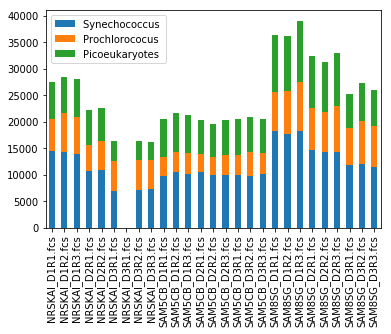

In [184]:
filtered_frame.plot(kind='bar', stacked=True)